# Lahman’s Baseball Database

This database contains pitching, hitting, and fielding statistics for
Major League Baseball from 1871 through 2016.  It includes data from
the two current leagues (American and National), the four other "major" 
leagues (American Association, Union Association, Players League, and
Federal League), and the National Association of 1871-1875. 

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
master = pd.read_csv("./baseballdatabank-2017.1/core/Master.csv")
# master = master[['playerID','nameGiven','debut','finalGame']]

In [3]:
# Master table sample
master.head(5)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
# Checking for required fields in Master table.
master.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

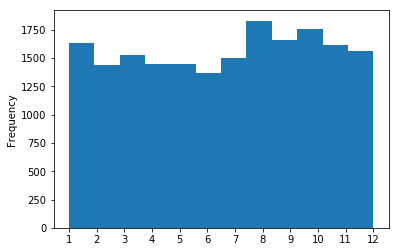

In [5]:
# Histogram plot of players birthmonth.
master.birthMonth.plot(kind='hist',bins=12,xticks=range(1,13))

* PlayesID associates player with his personal details like name,date of birth,deathdate etc.So,PlayerID is important field.
* Histogram plot of birthMonth among different players shows a near uniform distribution along different months.So,birthMonth might not provide any additional information regarding the performance of the player.Same can be said about birthDay.
* 

In [6]:
# Extracting important variables from master table
master = master[['playerID','birthYear','birthState','birthCity','deathState','deathCity',\
                 'nameGiven','weight','height','bats','throws']]

In [22]:
# Checking for null values in master table.
print ("Number of players whose birthYear is not recorded : {}".format(master.birthYear.isnull().value_counts()[1]))
print ("Number of players whose birthState is not recorded : {}".format(master.birthState.isnull().value_counts()[1]))
print ("Number of players whose birthCity is not recorded : {}".format(master.birthCity.isnull().value_counts()[1]))
print ("Number of players whose nameGiven is not recorded : {}".format(master.nameGiven.isnull().value_counts()[1]))

Number of players whose birthYear is not recorded : 132
Number of players whose birthState is not recorded : 571
Number of players whose birthCity is not recorded : 180
Number of players whose nameGiven is not recorded : 37


In [8]:
master.birthCity.value_counts()

Chicago                 376
Philadelphia            358
St. Louis               301
New York                267
Brooklyn                241
Los Angeles             233
Cincinnati              201
San Francisco           175
Baltimore               167
Santo Domingo           156
Cleveland               144
Pittsburgh              132
Detroit                 122
Houston                 121
San Diego               115
Washington              108
San Pedro de Macoris     96
Boston                   95
Oakland                  93
Springfield              90
Dallas                   85
La Habana                84
Louisville               82
Sacramento               80
Portland                 78
Atlanta                  74
Columbus                 73
Long Beach               72
New Orleans              71
Birmingham               69
                       ... 
Taitung City              1
Creola                    1
Coronado                  1
Lavinia                   1
Lone Elm            

In [9]:
# Replacing current players final date with current date.
date_object = datetime.now()
formatted_date = date_object.strftime('%Y-%m-%d')
master.finalGame.fillna(formatted_date,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'finalGame'

In [29]:
batting = pd.read_csv("./baseballdatabank-2017.1/core/Batting.csv")
# batting[batting.playerID == 'abercda01']
# batting = batting[['playerID','R','G']]
# batting = batting[['playerID','stint','teamID','lgID','AB','H','R','G','2B','3B','HR']]
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [ ]:
# Lot of the records are missing values in some feilds. These values  are facts. More detailed analysis of fields and data outside 
# of our current dataset is required to fill in these missing values.So, to avoid incorrect analysis ,records with incomplete data 
# dropped.

def process_data(df):
    """
    Takes in pandas dataframe.Removes records with null values.
    Removes duplicates and returns the cleaned dataset.
    """
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [ ]:
master = process_data(master)
batting = process_data(batting)

##### Analysis of Batting stats of players.

###### Is there a positive corellation between highest runs and number of matches? Or is there a corellation between number of runs and number of years players play?

In [ ]:
player_total_runs = batting.groupby(by='playerID',as_index = False).sum()
player_total_runs.sort_values(by = 'R',ascending=False)
plt = player_total_runs.plot(x='R',y='G',style='o',kind='scatter',title='Number of Runs Vs Number of Matches')

In [ ]:
# are players becoming more risky these days.is it paying off.